# **Import Library**

In [1]:
# import all necessary packages
import pandas as pd
import numpy as np


# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import plotly.express as px
import plotly.graph_objects as go


# **Data Load**

In [2]:
# load data to a new dataframe
df = pd.read_csv("data_revisi.csv")

In [3]:
# describe the dataframe with some statistical info
df

,Nama,gender,umur,average_wpm,average_accuracy,average_second
0,APS,1,25,60.33,0.99,377.60
1,AP,0,22,41.00,0.95,508.80
2,DAP,1,20,52.33,0.94,560.40
3,DF,1,22,38.67,0.81,320.60
4,DRF,1,20,28.00,1.00,639.40
...,...,...,...,...,...,...
94,abi,1,20,66.13,1.00,425.41
95,rani,0,20,34.09,0.82,464.42
96,farrel,1,20,50.09,0.82,415.59
97,hasan,1,21,44.58,0.81,481.00


# **Data Visualisasi**

In [4]:
figure = px.scatter(data_frame=df, x='average_wpm', y='average_second', size='average_second', trendline='ols')
figure.show()

# **Deklarasi Variabel**

In [5]:
average_wpm = df[['average_wpm']]
average_accuracy = df[['average_accuracy']]
average_second = df[['average_second']]
umur = df[['umur']]
gender = df[['gender']]
average_second

,average_second
0,377.60
1,508.80
2,560.40
3,320.60
4,639.40
...,...
94,425.41
95,464.42
96,415.59
97,481.00


# **STANDARISASI**
### *"average_accuracy"*

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
new_accuracy = pd.DataFrame(StandardScaler().fit_transform(average_accuracy), columns=average_accuracy.columns)
new_accuracy.head()

,average_accuracy
0,1.208842
1,0.540265
2,0.373120
3,-1.799757
4,1.375987


# **NORMALISASI** 
### _'average_wpm' dan 'average_second'_

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
#Normalize average_wpm
new_wpm = pd.DataFrame(MinMaxScaler().fit_transform(average_wpm), columns=average_wpm.columns)
new_wpm.head()

,average_wpm
0,0.625459
1,0.251499
2,0.470691
3,0.206423
4,0.000000


In [10]:
#Normalize average_second
new_second = pd.DataFrame(MinMaxScaler().fit_transform(average_second), columns=average_second.columns)
new_second.head()

,average_second
0,0.155583
1,0.354148
2,0.432243
3,0.069316
4,0.551806


# **Deklarasi Variabel *X* dan *Y***

In [13]:
X = pd.concat([new_accuracy, new_wpm, umur, gender], axis=1)
y = new_second

In [14]:
results = []

In [15]:
# Loop untuk menguji setiap random_state dari 1 hingga 100
for random_state in range(1, 101):
    # Bagi data menjadi data latih dan data uji
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Buat model regresi linear
    model = LinearRegression()
    
    # Latih model pada data latih
    model.fit(x_train, y_train)
    
    # Lakukan prediksi pada data uji
    y_pred = model.predict(x_test)
    
    # Hitung metrik evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Simpan hasil metrik dalam bentuk tuple
    result = (random_state, rmse, mae, mse, r2)
    
    # Tambahkan tuple hasil metrik ke dalam list results
    results.append(result)

In [16]:
# Konversi list hasil metrik menjadi DataFrame
results_df = pd.DataFrame(results, columns=['Random State', 'RMSE', 'MAE', 'MSE', 'R2'])

In [17]:
# Atur jumlah baris yang ditampilkan
pd.set_option("display.max_rows", None)

# Cetak DataFrame results_df
print(results_df)

    Random State      RMSE       MAE       MSE        R2
0              1  0.213478  0.171211  0.045573 -0.136231
1              2  0.217614  0.181643  0.047356 -0.569971
2              3  0.205687  0.181078  0.042307 -0.141514
3              4  0.195045  0.154466  0.038043 -0.438610
4              5  0.209759  0.186548  0.043999 -0.233821
5              6  0.294809  0.249684  0.086913 -0.504616
6              7  0.188389  0.157890  0.035490 -0.211873
7              8  0.191937  0.155762  0.036840 -0.009828
8              9  0.220487  0.186040  0.048615 -0.178322
9             10  0.227131  0.168034  0.051589 -0.009731
10            11  0.227846  0.186649  0.051914 -0.131315
11            12  0.266882  0.230727  0.071226 -0.155044
12            13  0.265805  0.231453  0.070652 -0.210687
13            14  0.182737  0.158948  0.033393  0.094231
14            15  0.278855  0.243666  0.077760 -0.044580
15            16  0.214156  0.189163  0.045863 -0.176613
16            17  0.196999  0.1

In [16]:
# train the model using training dataumns
model.fit(x_train, y_train)  

LinearRegression()

In [18]:
# print coefficients
model.coef_

array([[0.01644756, 0.06094001, 0.00246368, 0.03910881]])

In [19]:
# print y_intercept | bias
model.intercept_

array([0.30877685])

In [20]:
# make predictions using test data
y_pred = model.predict(x_test)

In [21]:
# evaluasi model
mse_2 = mean_squared_error(y_test, y_pred)
import math
rmse_2 = math.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

Text(0, 0.5, 'Predicted')

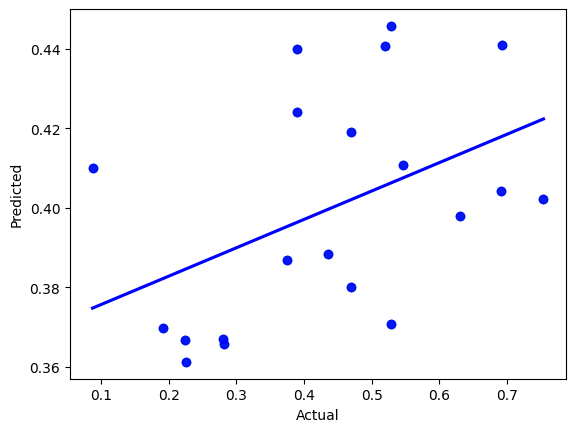

In [22]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='average_second'>

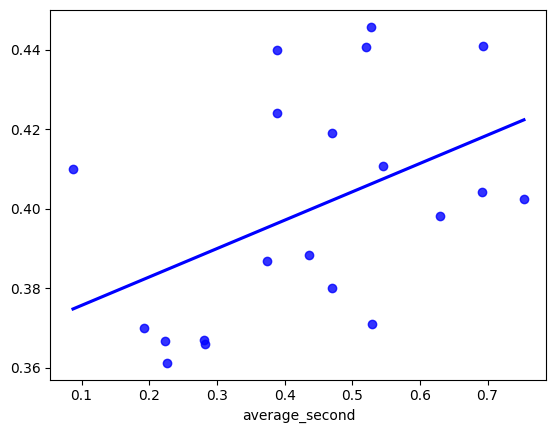

In [23]:
# plot regression model line
sns.regplot(x=y_test, y=y_pred, ci=None, color ='blue')

In [24]:
# create a metrics dataframe using metric values
metrics = {
    'Model': ['First'],
    'MSE' : [mse_2],
    'RMSE' : [rmse_2],
    'MAE' : [mae_2],
    'R2' : [r2_2]
    }

metrics_df = pd.DataFrame(data=metrics)

# compare the values
metrics_df

,Model,MSE,RMSE,MAE,R2
0,First,0.029269,0.171083,0.140622,0.077903
